# Introduction
In this project, I will be investigating a data set from the Titanic. This data set has the passengers' information, like Age, Gender, Survived? and more. The data set is not perfect and has some missing information for some passenger. Therefore, I should decide what to do with every missing data depending on its importance and its category. Finally, I am interested to see some unusual parameters that contributed to make some group of people to have a higher chance to survive.

# Importing the Necessary Libraries




In [618]:
import numpy as np
import pandas as pd
import matplotlib as plt
import seaborn as sns

# Opening the file and looking at it

In [619]:
# Using pandas to import the file 
Titanic_df = pd.read_csv('titanic-data.csv')

# A sample
Titanic_df.head(5) 

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#### From the table above, everything seems ok expect that I should change the Survived column to True/False. However, I will double check.

# Cheking the data types

In [620]:

print 'The age type is', type(Titanic_df.loc[3, 'Age'])
print 'The Fare type is', type(Titanic_df.loc[3, 'Fare'])
print 'The Survived status type is', type(Titanic_df.loc[3, 'Survived'])
                                              

The age type is <type 'numpy.float64'>
The Fare type is <type 'numpy.float64'>
The Survived status type is <type 'numpy.int64'>


#### We see that they are all appropriate data type, but I prefer changing the Survived column to Boolean.

In [621]:
# A function that will change the value of 0 to False and 1 to True
def To_Boolean (x):
    if x == 1:
        return True
    elif x == 0:
        return False
    else:
        return None

# Applying the funciton to the 'Survived' column:
Titanic_df['Survived']=Titanic_df['Survived'].apply(To_Boolean)

# Checking that it worked
Titanic_df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,False,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,True,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,True,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,True,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,False,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Dealing with missing values

In [626]:
# Finding which columns have missing values
Titanic_df.isnull().any()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked        True
dtype: bool

In [634]:
# We see that Age, Cabin and Embarked columns have some missing data
# To calculate the the missing samples I will use any() along with sum()
print Titanic_df['Age'].isnull().sum(),' samples is missingin in Age column', 'which is ',Titanic_df['Age'].isnull().sum()/891.0 *100,'%'
print Titanic_df['Cabin'].isnull().sum(), 'samples is missingin in Cabin column','which is ',Titanic_df['Cabin'].isnull().sum()/891.0 *100,'%'
print Titanic_df['Embarked'].isnull().sum(), 'samples is missingin in Embarked column',  'which is ',Titanic_df['Embarked'].isnull().sum()/891.0 *100,'%'

177  samples is missingin in Age column which is  19.8653198653 %
687 samples is missingin in Cabin column which is  77.1043771044 %
2 samples is missingin in Embarked column which is  0.224466891134 %


We see that the missing data in the Embarked column is negligible and we can give them random values. In addition, the Age column is considerable and I would fill it with the mean value. However, the Cabin column has a significant amount of missing data and thus I won't consider it in my analysis.

## Age Column
For the age column, I decided to give the missin ages the mean of the ages.

In [593]:
# Using fillna method I can replace the missing values by the mean.

Titanic_df['Age'] = Titanic_df['Age'].fillna(Titanic_df['Age'].mean())

# Checking that it worked

Titanic_df.isnull().any()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age            False
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked        True
dtype: bool

# Asking questions 

1. I want to see if men/women who had children had a higher chance to survive or not.
2. I want to see if men/women who had a spouce had a higher chance to survive or not.
3. I want to see if the classes has anything to do with survival.
4. I want to see if the age has anything to do with survival.

In addition, I need to performe some statistics.

# Some Statistics 

In [582]:
# Survival Rate
Sur_Rate = Titanic_df['Survived'].sum()/float(len(Titanic_df)) *100

# Survival Rate among Females
Sur_Rate_F = Titanic_df.query("Sex == 'female'")['Survived'].sum()/float(len(Titanic_df.query("Sex == 'female'"))) *100

# Survival Rate among Males
Sur_Rate_M = Titanic_df.query("Sex == 'male'")['Survived'].values.sum()/float(len(Titanic_df.query("Sex == 'male'"))) *100

print 'Men :',int(Sur_Rate_M), '% , Women :', int(Sur_Rate_F), '% and the overall : ', int(Sur_Rate),'%'

# I am converting them to integers because the decemals no significant effect in our case

Men : 18 % , Women : 74 % and the overall :  38 %


## 1. Children and Survival  

Here I will work on the relation between having children and survival.


In [131]:
# query method allow me to select particular data based on some rule insteade of using a loop 
has_child = Titanic_df.query('Parch > 0 & Age > 20') 


has_child_survived = has_child.query('Survived == True')

# Reference 
#  https://stackoverflow.com/questions/39880627/in-pandas-how-to-delete-rows-from-a-data-frame-based-on-another-data-frame

# Using isin and invert and dropna that will exclude the passenger in has_child
no_child = Titanic_df[~Titanic_df.query('Age > 20').isin(has_child)].dropna(axis = 0)

# Checking that has_child and no_child are mutually exclusive
no_child.isin(has_child).any().any()

False

In [594]:
# Finding survival among those who had children 
no_child_survived = no_child.query('Survived == True')


# Looking at the numbers only

print 'The number of passengers who had children and survived is', len(has_child_survived)
print 'The number of passengers who did not have a child and survived is' , len(no_child_survived)


The number of passengers who had children and survived is 57
The number of passengers who did not have a child and survived is 83


In [130]:
# Looking at percentages
print 'The Percentage of passengers who had children and survived is', len(has_child_survived)/float(len(has_child)) *100 ,'%'
print 'The Percentage of passengers who did not have a child and survived is' , float(len(no_child_survived))/len(no_child) *100, '%'

The Percentage of passengers who had children and survived is 47.5 %
The Percentage of passengers who did not have a child and survived is 63.8461538462 %


## Observation 
The percentage of the people without children is higher, I think they had a higher chance to survive because they have more freedom as compared to those who had children.

## 2. Spouse and Survival

Here I will work on the relation betweein having a spouce and survival. The procedure is as follows:
1. Create a list of those who had a spouce.
2. Finding the survival percentage.
3. Comparing it with the overall survival percetage.

### 2.1 A list of spouces

Making a list that contains spouces is difficult. To approximate it, I will be doing this:
1. Modify the 'Name' column and make it contains only the last names.
2. Logically, any spouce will have the 'SibSp' column greater than zero and there is someone else with the same last name but with different gender. In addition, their ages must be more than 17.



In [597]:
# A fucntion that replace the full by the last name
def last_name(name):
    return name.split(',')[0]

# Applying the function
Titanic_df['Name'] = Titanic_df['Name'].apply(last_name)

# Checking that it worked
Titanic_df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,False,3,Braund,male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,True,1,Cumings,female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,True,3,Heikkinen,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,True,1,Futrelle,female,35.0,1,0,113803,53.1000,C123,S
4,5,False,3,Allen,male,35.0,0,0,373450,8.0500,NaN,S


In [602]:
# First let's take those who might have a spouce
Mature = Titanic_df.query('SibSp > 0 & Age > 17')
# Then, let's seperate them Males and Females
Female = Mature.query("Sex == 'female'")
Male = Mature.query("Sex == 'male'")

# Quick look
Female.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,True,1,Cumings,female,38.000000,1,0,PC 17599,71.2833,C85,C
3,4,True,1,Futrelle,female,35.000000,1,0,113803,53.1000,C123,S
18,19,False,3,Vander Planke,female,31.000000,1,0,345763,18.0000,NaN,S
25,26,True,3,Asplund,female,38.000000,1,5,347077,31.3875,NaN,S
31,32,True,1,Spencer,female,29.699118,1,0,PC 17569,146.5208,B78,C


In [603]:
# Quick look
Male.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,False,3,Braund,male,22.0,1,0,A/5 21171,7.2500,NaN,S
13,14,False,3,Andersson,male,39.0,1,5,347082,31.2750,NaN,S
27,28,False,1,Fortune,male,19.0,3,2,19950,263.0000,C23 C25 C27,S
34,35,False,1,Meyer,male,28.0,1,0,PC 17604,82.1708,NaN,C
35,36,False,1,Holverson,male,42.0,1,0,113789,52.0000,NaN,S


In [604]:
# Making sure that we covered all the data 
len(Male) + len(Female) - len(Mature) is 0 

True

In [605]:
# Making sure that the two dataframes are mutually exclusive 
Female.isin(Male).any().any()

False

In [606]:
# Now, I need to obtain the last names of the spouces
Sp_name_F = set(Female[Female['Name'].isin(Male['Name'])]['Name'])

Sp_name_M=set(Male[Male['Name'].isin(Female['Name'])]['Name'])

# While I know the two sets are the same, but to double check :) 
Sp_name = Sp_name_F.union(Sp_name_M)

# Creating a dataframe for spouces
Spouces = Mature[Mature['Name'].isin(list(Sp_name))]

### 2.2 The survival pecentages

In [607]:

# Creating no spouce dataframe 
no_spouces = Mature[~Mature['Name'].isin(Spouces['Name'])]
#Checking that they are mutually exclusive 
no_spouces['Name'].isin(Spouces['Name']).any().any()

False

In [608]:
# Checking that nothing is missing
len(no_spouces)+ len(Spouces) - len(Mature) is 0

True

In [609]:
# Gathering the survival status
spouces_survived = Spouces.query('Survived == True')
no_spouces_survived = no_spouces.query('Survived == True')

# Calculating the percentages

print 'The percentage of survival in spouces is', len(spouces_survived)/float(len(Spouces))*100,'%'

print 'The percetage of survival in the others is', len(no_spouces_survived)/float(len(no_spouces))*100,'%'



The percentage of survival in spouces is 46.7889908257 %
The percetage of survival in the others is 46.1538461538 %


## Observation 
We see that the percentages are almost the same, so there seems to be no relation between surviving and having a spouce

# Some Statistics 

In [610]:
# Survival Rate
Sur_Rate = Titanic_df['Survived'].sum()/float(len(Titanic_df)) *100

# Survival Rate among Females
Sur_Rate_F = Titanic_df.query("Sex == 'female'")['Survived'].sum()/float(len(Titanic_df.query("Sex == 'female'"))) *100

# Survival Rate among Males
Sur_Rate_M = Titanic_df.query("Sex == 'male'")['Survived'].values.sum()/float(len(Titanic_df.query("Sex == 'male'"))) *100

print 'Men :',int(Sur_Rate_M), '% , Women :', int(Sur_Rate_F), '% and the overall : ', int(Sur_Rate),'%'

# I am converting them to integers because the decemals no significant effect in our case

Men : 18 % , Women : 74 % and the overall :  38 %


# Age Histograms 

### 1. Age Distribution:

Populating the interactive namespace from numpy and matplotlib


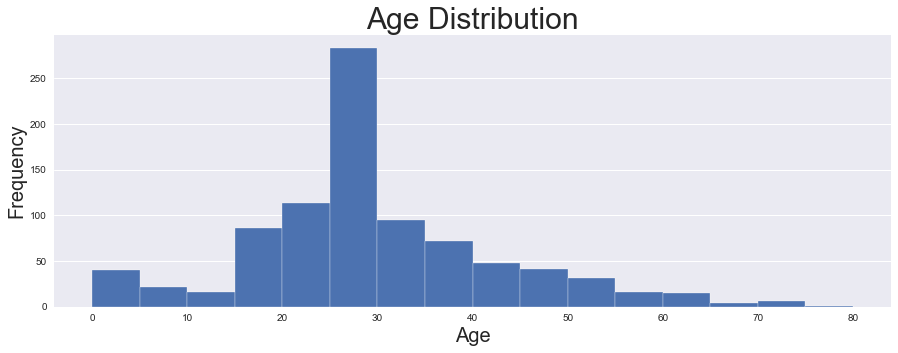

In [611]:
%pylab inline

Age_hist = Titanic_df['Age'].hist(bins = range(0,85,5), ec='w', figsize= (15,5))
Age_hist.set_title("Age Distribution", fontsize = 30)
Age_hist.set_xlabel('Age', fontsize=20)
Age_hist.set_ylabel('Frequency', fontsize =20)
Age_hist.grid(axis ='x')


### 2. Age Distribution in The Young Survival: 

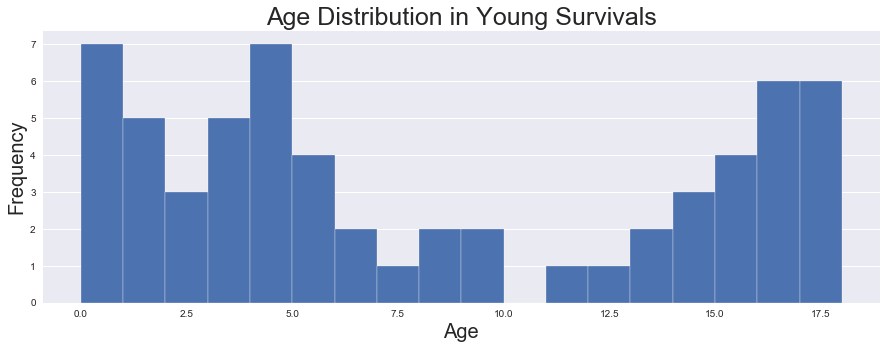

In [612]:
Age_hist = Titanic_df.query('Survived == True & Age < 18')['Age'].hist(bins = range(0,19,1), ec='w', figsize= (15,5))
Age_hist.set_title("Age Distribution in Young Survivals", fontsize = 25)
Age_hist.set_xlabel('Age', fontsize=20)
Age_hist.set_ylabel('Frequency', fontsize =20)
Age_hist.grid(axis ='x')

It looks like if you are very young, someone will take care of you and if you are over 13 you will be able to survive, otherwise it will is very hard to survived as no one will take care of you and you don't the physical ability to endure.

# Classes, Spouses  and Survival

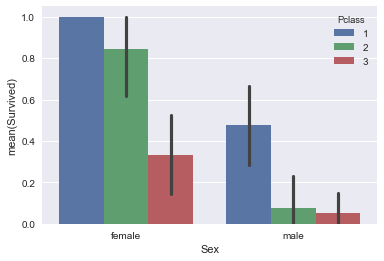

In [613]:

sns.barplot(data = Spouces, hue='Pclass', x='Sex', y='Survived' )

## Observation 
From the this plot we see two things:
1. In case of spouces, females had a higher chance to live.
2. Those who were in the first class had a higher chance to live!

A Possibles justificaiton for why Class 3 has a very low rate for surival is that it is very crowded compared to the first class. However, I should check that.

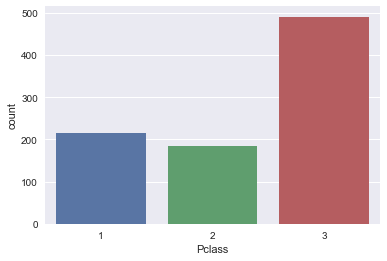

In [614]:
sns.countplot(data = Titanic_df, x='Pclass')

As expected, the Third class has alomost double the number of people in the first.

## 3. Age and Survival

Here, I want to see the relation between age and survival by creating a histogram.


In [615]:
# Refrence
# https://stackoverflow.com/questions/34682828/pandas-extracting-specific-selected-columns-from-a-dataframe-to-new-dataframe

Age_Sur = Titanic_df[['Age', 'Survived']].copy() # Getting the Age Survived columns from the original dataframe

Age_Sur['Age'] = Age_Sur['Age'].apply(int)  # Converting the Age column to integer instead of float

# Check a sample
Age_Sur.head(5)

,Age,Survived
0,22,False
1,38,True
2,26,True
3,35,True
4,35,False


In [616]:
# Grouping the data by Age and taking the mean
Age_gourp = Age_Sur.groupby(by ='Age').mean()
Age_gourp['Survived'] = Age_gourp['Survived'] *100 # To make them  percentages
# Check a sample
Age_gourp.head()

,Survived
Age,
0,100.000000
1,71.428571
2,30.000000
3,83.333333
4,70.000000


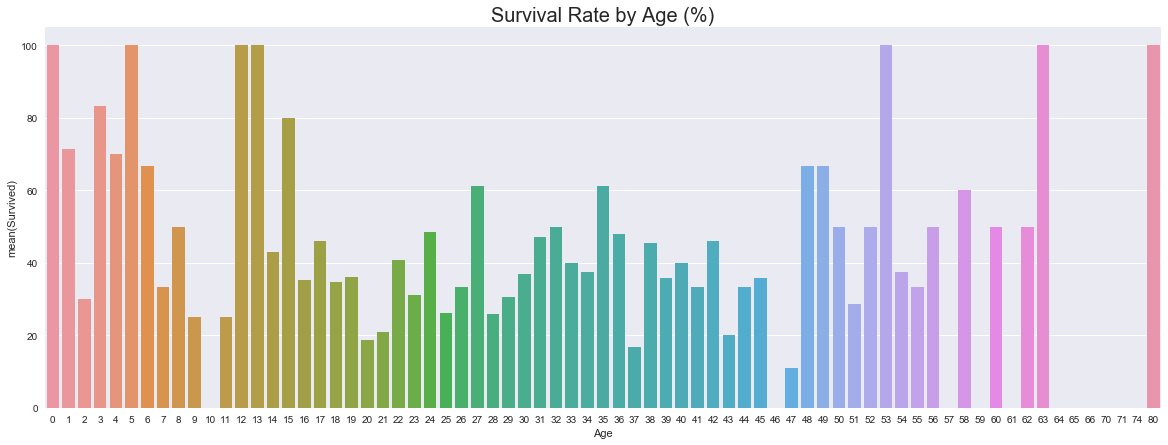

In [617]:
# Reference
#   https://elitedatascience.com/python-seaborn-tutorial

# Creating a barplot that shows every age and the corresponding survival rate
plt.figure(figsize= (20,7))
plt.title('Survival Rate by Age (%)', size = 20)
Age_gourp_barplot= sns.barplot(x= Age_gourp.index ,data=Age_gourp, y='Survived')


### Observation 
From the histogram, I see that most of the very young and old people survived; the weak people!


# Sources of Errors 
1. The spouses set has an odd number of people, so surely it includes at least one person who doesn't have a spouse.
2. The missing ages were replaced by the mean, so the age Distribution is not 100% accurate.
3. The Assumption made for having child/spouse could are not 100% accurate.

# Conclusion 

We see that those who have children or spouse had a higher chance to survive and so do elderly and very young people. I see that this is because they had special treatment from other people. In addition, the crowding in the third class contributed take the survival percentage down. Finally, the survival age barplot show that weak people had a higher chance to live!
